In [1]:
''''
///////////////////////ROADMAP///////////////////////////////////
State the question and determine required data
Acquire the data in an accessible format
Identify and correct missing data points/anomalies as required
Prepare the data for the machine learning model
Establish a baseline model that you aim to exceed
Train the model on the training data
Make predictions on the test data
Compare predictions to the known test set targets and calculate performance metrics
If performance is not satisfactory, adjust the model, acquire more data, or try a different modeling technique
Interpret model and report results visually and numerically
'''
#https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

"'\nROADMAP\nState the question and determine required data\nAcquire the data in an accessible format\nIdentify and correct missing data points/anomalies as required\nPrepare the data for the machine learning model\nEstablish a baseline model that you aim to exceed\nTrain the model on the training data\nMake predictions on the test data\nCompare predictions to the known test set targets and calculate performance metrics\nIf performance is not satisfactory, adjust the model, acquire more data, or try a different modeling technique\nInterpret model and report results visually and numerically\n"

In [45]:
# Pandas is used for data manipulation
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Read in data and display first 5 rows
data_iz = pd.read_csv(r'D:\ACADEMIC\2020-Spring\TuGraz\Data\Combined_Izmir_full.csv')

data_iz.head(5)
#check Missing Data
#print('The shape of our data_iz is:', data_iz.shape)

# Descriptive statistics for each column
#data_iz.describe()

,Cooling,Heating,Lighting,Equipment,Floor_Area,Floor_Number,ofPeople_service,ofPeople_living,ofPeople_bedroom,Construction_recorded,...,w_north-west,total_window_area,o_north,o_north-east,o_east,o_south-east,o_south,o_south-west,o_west,o_north-west
0,30.12,31.16,7.02,2.38,57.88,1,0.069,0.069,0.035,0,...,0,10.38,0,0,0,0,1,1,1,0
1,17.17,19.20,12.11,2.38,52.23,1,0.180,0.180,0.090,0,...,0,12.75,0,0,0,0,0,0,0,0
2,37.07,33.79,7.21,2.38,127.95,1,0.126,0.126,0.063,0,...,0,16.72,0,1,0,0,0,0,0,0
3,29.50,37.03,12.68,2.38,110.90,1,0.075,0.075,0.037,0,...,0,8.82,0,0,0,0,0,0,0,0
4,15.90,28.61,11.38,2.38,62.66,1,0.131,0.131,0.066,0,...,0,11.68,0,0,0,1,0,0,0,0


In [58]:
'''
Cooling = data_iz['Cooling(kWh/sqm)']
Heating = data_iz['Heating(kWh/sqm)']
Lighting = data_iz['Lighting(kWh/sqm)']

plt.style.use('seaborn-whitegrid')

data_iz['Cooling(kWh/sqm)'].plot(color='red', figsize=[30,10])
data_iz['Heating(kWh/sqm)'].plot(color='blue')
data_iz['Lighting(kWh/sqm)'].plot(color='orange')

plt.title('Energy Demand Types')
plt.ylabel('kWh/sqm')
plt.xlabel('Cases')
plt.legend()
'''

"\nCooling = data_iz['Cooling(kWh/sqm)']\nHeating = data_iz['Heating(kWh/sqm)']\nLighting = data_iz['Lighting(kWh/sqm)']\n\nplt.style.use('seaborn-whitegrid')\n\ndata_iz['Cooling(kWh/sqm)'].plot(color='red', figsize=[30,10])\ndata_iz['Heating(kWh/sqm)'].plot(color='blue')\ndata_iz['Lighting(kWh/sqm)'].plot(color='orange')\n\nplt.title('Energy Demand Types')\nplt.ylabel('kWh/sqm')\nplt.xlabel('Cases')\nplt.legend()\n"

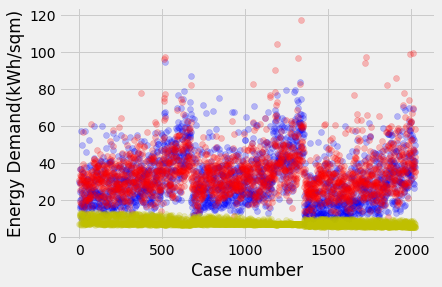

In [46]:
dataIZ = pd.read_csv(r'D:\ACADEMIC\2020-Spring\TuGraz\Data\Combined_Izmir_full.csv')
Cooling = dataIZ['Cooling']
Heating = dataIZ['Heating']
Lighting = dataIZ['Lighting']

data = (Cooling, Heating, Lighting)
colors = ("b", "r", "y")
y = Cooling.index

fig, ax = plt.subplots()

for i in range(len(data)):
    ax.scatter(y, data[i], c= colors[i], alpha=0.25)

ax.set_xlabel('Case number')
ax.set_ylabel('Energy Demand(kWh/sqm)')
plt.show()

In [47]:
# Use numpy to convert to arrays
import numpy as np
# just one time execute
labelCool = np.array(data_iz['Cooling'])
labelHeat = np.array(data_iz['Heating'])
labelLight = np.array(data_iz['Lighting'])
labelEquip = np.array(data_iz['Equipment'])

# we do not drop Lighting because we will use that column to tune the model
data_iz= data_iz.drop(['Cooling', 'Heating','Equipment'], axis = 1)
feature_list = list(data_iz.columns)
data_iz = np.array(data_iz)
data_iz

array([[  7.02,  57.88,   1.  , ...,   1.  ,   1.  ,   0.  ],
       [ 12.11,  52.23,   1.  , ...,   0.  ,   0.  ,   0.  ],
       [  7.21, 127.95,   1.  , ...,   0.  ,   0.  ,   0.  ],
       ...,
       [  7.47,  84.12,   6.  , ...,   0.  ,   0.  ,   0.  ],
       [  5.79,  61.49,   6.  , ...,   0.  ,   1.  ,   0.  ],
       [  5.8 ,  57.15,   6.  , ...,   0.  ,   0.  ,   0.  ]])

In [80]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(data_iz, labelHeat, 
                                                                            test_size = 0.25, random_state = 42)

print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (1517, 26)
Training Labels Shape: (1517,)
Testing Features Shape: (506, 26)
Testing Labels Shape: (506,)


In [81]:
#transform data for machine learning
'''
One-hot encoded categorical variables
Split data into features and labels
Converted to arrays
Split data into training and testing sets
'''
# Establish Baseline:a sensible measure that we hope to beat with our model
# The baseline predictions are the historical averages
baseline_preds = test_features[:, feature_list.index('Lighting')]
# Baseline errors, and display average baseline error
baseline_errors = abs(baseline_preds - test_labels)
baseline_errors_RMSE = baseline_preds - test_labels
print('MAE: ', round(np.mean(baseline_errors), 2))
print('RMSE: ', round(np.sqrt(np.mean((baseline_errors_RMSE)**2)), 2))

MAE:  27.23
RMSE:  30.0


In [82]:
#Import RandomForest
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels);

In [83]:
#Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
errorsRMSE = predictions - test_labels
# Print out the mean absolute error (mae)
print('MAE:', round(np.mean(errors), 2))
print('RMSE:', round(np.sqrt(np.mean((errorsRMSE)**2)), 2))

MAE: 4.67
RMSE: 6.5


In [13]:
#as a result the prediction %25 better than baseline (28.5, 7.36)

In [84]:
#Determine Performance Metrics
# Calculate RMSE percentage error (RMSEP)
rmsep = 100 * (errorsRMSE / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(rmsep)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 96.91 %.


In [53]:
#Improve Model if Necessary with hypermeter tuning
'''
There are two approaches to get under the hood of the random forest: first, we can look at a single tree in the forest, 
and second, we can look at the feature importances of our explanatory variables.
'''

'\nThere are two approaches to get under the hood of the random forest: first, we can look at a single tree in the forest, \nand second, we can look at the feature importances of our explanatory variables.\n'

In [54]:
#First, visualize a single decision tree
from sklearn.tree import export_graphviz
import pydot

# Pull out one tree from the forest
tree = rf.estimators_[5]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')

# Write graph to a png file using web link
#https://onlineconvertfree.com/convert-format/dot-to-png/

In [55]:
#limit the depth of trees in the forest to produce an understandable image
# Limit depth of tree to 3 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(train_features, train_labels)
# Extract the small tree
tree_small = rf_small.estimators_[5]
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')

In [85]:
# VARIABLE IMPORTANCES: sort importance of variables

# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: total_window_area    Importance: 0.25
Variable: Window_Count         Importance: 0.22
Variable: Floor_Number         Importance: 0.19
Variable: Lighting             Importance: 0.09
Variable: Floor_Area           Importance: 0.04
Variable: ofPeople_bedroom     Importance: 0.04
Variable: Construction_recorded Importance: 0.03
Variable: ofPeople_service     Importance: 0.02
Variable: ofPeople_living      Importance: 0.02
Variable: schedule_recorded    Importance: 0.01
Variable: w_north-east         Importance: 0.01
Variable: w_south-east         Importance: 0.01
Variable: w_south              Importance: 0.01
Variable: w_south-west         Importance: 0.01
Variable: w_north-west         Importance: 0.01
Variable: o_south-east         Importance: 0.01
Variable: o_south              Importance: 0.01
Variable: o_south-west         Importance: 0.01
Variable: w_north              Importance: 0.0
Variable: w_east               Importance: 0.0
Variable: w_west               Importance

In [92]:
# New random forest with only the two most important variables
rf_most_important = RandomForestRegressor(n_estimators= 100, random_state=42)
# Extract the two most important features
important_indices = [feature_list.index('Floor_Number'), feature_list.index('Window_Count')]
train_important = train_features[:, important_indices]
test_important = test_features[:, important_indices]
# Train the random forest
rf_most_important.fit(train_important, train_labels)
# Make predictions and determine the error
predictions = rf_most_important.predict(test_important)
errorsRMSE = predictions - test_labels
# Display the performance metrics
print('RMSE:', round(np.sqrt(np.mean((errorsRMSE)**2)), 2))
rmsep = np.mean(100 * (errorsRMSE / test_labels))
accuracy = 100 - rmsep
print('Accuracy:', accuracy, '%.')

RMSE: 9.18
Accuracy: 94.36744415555904 %.


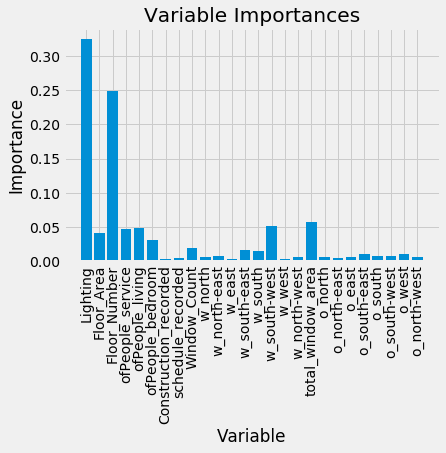

In [58]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

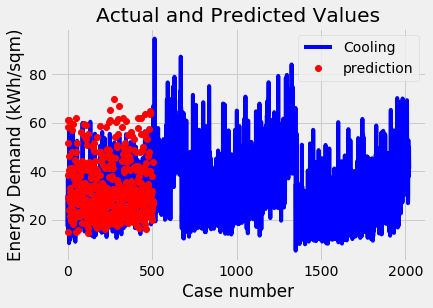

In [68]:
# Dataframe with true values and dates
true_data = pd.DataFrame(data = {'Cooling': labelCool})

# Dataframe with predictions and dates
predictions_data = pd.DataFrame(data = {'prediction': predictions})
# Plot the actual values
plt.plot(true_data['Cooling'], 'b-', label = 'Cooling')
# Plot the predicted values
plt.plot(predictions_data['prediction'], 'ro', label = 'prediction')
plt.xticks(rotation = '0'); 
plt.legend()
# Graph labels
plt.xlabel('Case number'); plt.ylabel('Energy Demand (kWh/sqm)'); plt.title('Actual and Predicted Values');

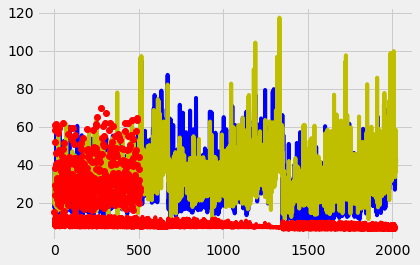

In [27]:
'''
true_data['Cooling'] = true_data[:, feature_list.index('Cooling')]
true_data['average'] = features[:, feature_list.index('average')]
true_data['friend'] = features[:, feature_list.index('friend')]

# Plot all the data as lines
plt.plot(true_data['date'], true_data['actual'], 'b-', label  = 'actual', alpha = 1.0)
plt.plot(true_data['date'], true_data['temp_1'], 'y-', label  = 'temp_1', alpha = 1.0)
plt.plot(true_data['date'], true_data['average'], 'k-', label = 'average', alpha = 0.8)
plt.plot(true_data['date'], true_data['friend'], 'r-', label = 'friend', alpha = 0.3)

# Formatting plot
plt.legend(); plt.xticks(rotation = '60');

# Lables and title
plt.xlabel('Date'); plt.ylabel('Maximum Temperature (F)'); plt.title('Actual Max Temp and Variables');
'''

0       30.12
1       17.17
2       37.07
3       29.50
4       15.90
        ...  
2018    41.04
2019    46.19
2020    37.87
2021    49.63
2022    41.03
Name: Cooling, Length: 2023, dtype: float64